Analysis of the MCMC optimization 

In [687]:
using DataFrames , CSV , Statistics
using PyPlot

## directory
rootdir = "/home/stephane/Science/cluster/GAIA"
wdir    = "/home/stephane/Science/cluster/GAIA/products"
plotdir = "/home/stephane/Science/cluster/GAIA/products/testfull"

cd(wdir)

In [688]:
## Reading and joining the results from normal and full MCMC dbscan optimization.

mc     = CSV.read("ngclist-mcmc.csv" , delim = ";")
mcfull = CSV.read("ngclist-mcmc_full.csv", delim = ";")
mcj    = join(mc,mcfull, on = :votname, makeunique=true)

,votname,epsm,epsd,mneim,mneid,mclm,mcld,qcm,qcd,qnm,qnd,epsm_1,epsd_1,mneim_1,mneid_1,mclm_1,mcld_1,qcm_1,qcd_1,qnm_1,qnd_1,w3dm,w3dd,wvelm,wveld,whrdm,whrdd
,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,NGC 1027-1.2deg.vot,2.90354,0.509942,7.54679,4.6747,17.0746,6.97987,2.36209,0.117574,324.543,78.4669,2.2091,0.481388,6.89544,4.188,16.9837,6.46696,2.54687,0.0858376,324.35,79.3179,4.6521,2.346,9.3364,3.81437,2.11691,0.882277
2,NGC 1039-3.6deg.vot,2.23761,0.419269,8.71961,5.97519,16.6047,7.83431,2.8107,0.0865665,263.96,35.8473,1.98011,0.468126,7.46187,4.47528,17.4069,6.74985,2.82044,0.0939385,276.065,37.4129,4.00086,2.02172,6.51956,2.34097,2.08162,0.920173
3,NGC 129-0.8deg.vot,3.52553,0.467642,5.74958,3.31842,15.0413,5.61515,1.69412,0.295232,126.901,62.6572,2.45874,0.630478,5.96903,3.625,16.9071,6.32764,2.00144,0.0922284,223.671,77.6008,2.6511,1.76277,8.37507,2.84354,2.02144,0.843538
4,NGC 1342-1.4deg.vot,2.62168,0.535881,8.59507,4.73296,14.7336,5.73379,2.35232,0.10781,169.115,24.3246,2.09327,0.630165,7.25142,4.39729,17.0203,6.54854,2.52362,0.0716289,182.303,23.1726,3.25644,2.00966,7.49311,3.58812,1.95594,0.791365
5,NGC 1348-0.6deg.vot,3.15918,0.760559,8.4622,6.04807,5.52414,2.67362,1.14339,0.11351,9.06993,1.26519,5.54683,0.949551,5.63736,3.51735,17.1975,6.39776,1.22871,0.0630656,1171.43,455.107,8.12227,2.86979,1.48535,1.1264,2.25317,0.948906
6,NGC 1496-0.3deg.vot,3.83463,0.627371,6.5288,5.08575,11.3257,4.45757,1.22837,0.136984,19.3716,4.34279,2.64976,0.665105,6.8658,3.8972,16.4339,6.26049,1.65265,0.0886289,79.8878,19.6243,1.02175,0.588694,8.35966,2.45303,1.94174,0.776799
7,NGC 1502-1.5deg.vot,3.63005,0.537544,7.94039,4.4043,18.6444,7.10763,1.95569,0.119838,106.363,30.4454,2.61436,0.724172,6.62604,4.09965,17.1146,6.4485,2.18438,0.0755276,136.227,37.356,3.24256,1.97641,7.42929,2.26196,2.2638,0.883316
8,NGC 1513-0.8deg.vot,3.48859,0.538635,6.60506,4.17056,15.9654,6.54881,1.93545,0.116533,166.562,74.5334,2.94594,0.632497,5.57476,3.36132,16.3976,6.471,2.10996,0.0956131,208.598,54.005,4.4411,2.34941,8.19632,2.92923,1.99396,0.820874
9,NGC 1528-2.2deg.vot,2.83098,0.428665,7.2644,3.76261,15.8205,5.40586,2.19421,0.131446,236.409,69.7632,2.3676,0.552353,7.24109,4.20088,17.7179,6.42997,2.35045,0.10833,274.184,71.9859,4.52367,2.07558,8.76901,2.57166,2.03223,0.899631


In [689]:
sc     = CSV.read("ngclist-SCproperties.csv",delim = ";")
scfull = CSV.read("ngclist-SCproperties_full.csv",delim = ";")
scj    = join(sc,scfull, on = :votname, makeunique=true)

,votname,nstars,distance,l,b,vra,vdec,xdisp,ydisp,zdisp,vradisp,vdecdisp,nstars_1,distance_1,l_1,b_1,vra_1,vdec_1,xdisp_1,ydisp_1,zdisp_1,vradisp_1,vdecdisp_1
,String⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,NGC 1027-1.2deg.vot,351,1129.17,135.752,1.53905,-9.25972,11.1751,42.9743,4.01952,3.0616,1.38978,1.51776,327,1129.61,135.759,1.5449,-9.26678,11.2889,43.1671,3.80022,2.88778,1.08668,1.27559
2,NGC 1039-3.6deg.vot,270,511.991,143.672,-15.6663,2.0043,-13.8421,16.5598,3.29687,2.58066,0.816174,0.930915,273,512.786,143.669,-15.6713,2.00502,-13.8343,17.0233,3.33992,2.70778,0.77532,0.861811
3,NGC 129-0.8deg.vot,122,1946.5,120.349,-2.54344,-23.7447,-10.0337,33.7477,5.00462,3.95058,1.6543,1.59252,214,1889.4,120.349,-2.53863,-23.2788,-9.82381,71.1208,5.63201,4.36781,1.41217,1.18653
4,NGC 1342-1.4deg.vot,177,662.591,154.924,-15.3259,2.04029,-5.03728,15.5792,3.49861,2.92935,0.850492,0.905856,183,663.162,154.931,-15.3329,2.04918,-5.01626,16.2432,3.88535,3.08415,0.758607,0.848291
5,NGC 1348-0.6deg.vot,8,173.56,146.898,-3.85453,18.5911,-21.5392,3.05119,1.02692,0.877703,0.32857,0.471655,1243,722.056,146.983,-3.69079,12.186,-18.6004,252.173,3.62486,3.70352,21.4128,19.5278
6,NGC 1496-0.3deg.vot,22,1642.92,149.844,0.196893,11.5295,-6.32349,12.0617,2.64078,2.51636,1.17069,1.44705,84,1634.17,149.838,0.189039,11.4643,-6.18733,80.8099,2.40899,2.61875,1.49698,1.46527
7,NGC 1502-1.5deg.vot,106,1070.96,143.607,7.66368,-3.18477,-4.36983,24.3594,4.04131,4.32683,0.956502,1.10258,121,1082.07,143.612,7.64854,-3.20488,-4.32082,30.1181,4.09578,4.55078,0.916669,0.931351
8,NGC 1513-0.8deg.vot,184,1524.85,152.59,-1.58528,9.76941,-26.694,48.6144,3.4372,2.91429,1.57997,1.80214,190,1520.01,152.593,-1.58334,9.64752,-26.5418,51.7794,3.52755,2.81917,1.44615,1.63427
9,NGC 1528-2.2deg.vot,248,1036.37,152.033,0.275166,10.7403,-11.0526,34.4288,4.21023,3.10191,1.40848,1.25424,253,1037.84,152.044,0.264659,10.6635,-11.0314,35.3736,4.62486,3.28306,1.12744,1.07065


In [690]:
println("## Summary :")
println("##")
println("## votable with dbscan-only :",size(sc))
println("## votable with dbscan-weighting :",size(scfull))
println("## Join votable :",size(scj))

## Summary :
##
## votable with dbscan-only :(51, 12)
## votable with dbscan-weighting :(13, 12)
## Join votable :(13, 23)


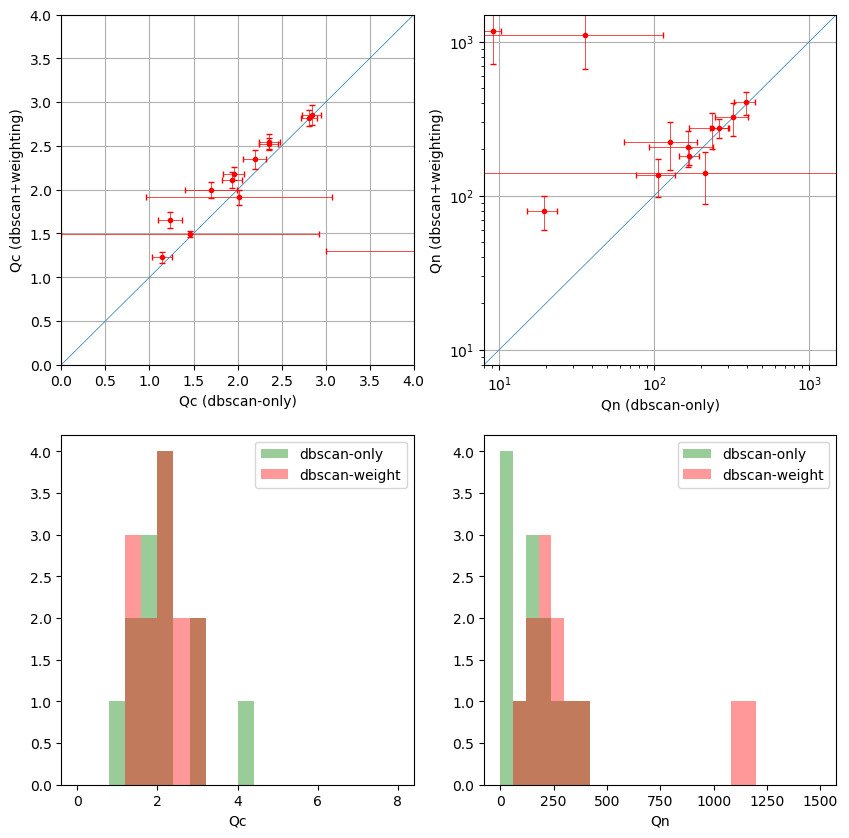

In [697]:
## Q comparisons

fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10.],[0.,10] ,linewidth = 0.5)
errorbar(mcj[:qcm],mcj[:qcm_1] , xerr=mcj[:qcd],yerr= mcj[:qcd_1] , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax[:set_xlim]([0.,4.])
ax[:set_ylim]([0.,4.])
xlabel("Qc (dbscan-only)")
ylabel("Qc (dbscan+weighting)")

ax = subplot(222)
grid("on") 
plot([1.,10000.],[1.,10000], linewidth = 0.5)
xscale("log")
yscale("log")
errorbar(mcj[:qnm],mcj[:qnm_1] , xerr=mcj[:qnd],yerr= mcj[:qnd_1] , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax[:set_xlim]([8.,1500.])
ax[:set_ylim]([8.,1500.])
xscale("log")
yscale("log")
xlabel("Qn (dbscan-only)")
ylabel("Qn (dbscan+weighting)")

ax = subplot(223)
nbins = 20
h = plt[:hist](mcj[:qcm],nbins,range = [0,8], color = "g", alpha=0.4 , label = "dbscan-only")
h = plt[:hist](mcj[:qcm_1],nbins,range = [0,8], color = "r", alpha=0.4 , label = "dbscan-weight")
legend()
xlabel("Qc")

ax = subplot(224)
nbins = 25
h = plt[:hist](mcj[:qnm],nbins,range = [0,1500], color = "g", alpha=0.4 , label = "dbscan-only")
h = plt[:hist](mcj[:qnm_1],nbins,range = [0,1500], color = "r", alpha=0.4 , label = "dbscan-weight")
legend()
xlabel("Qn")

show()

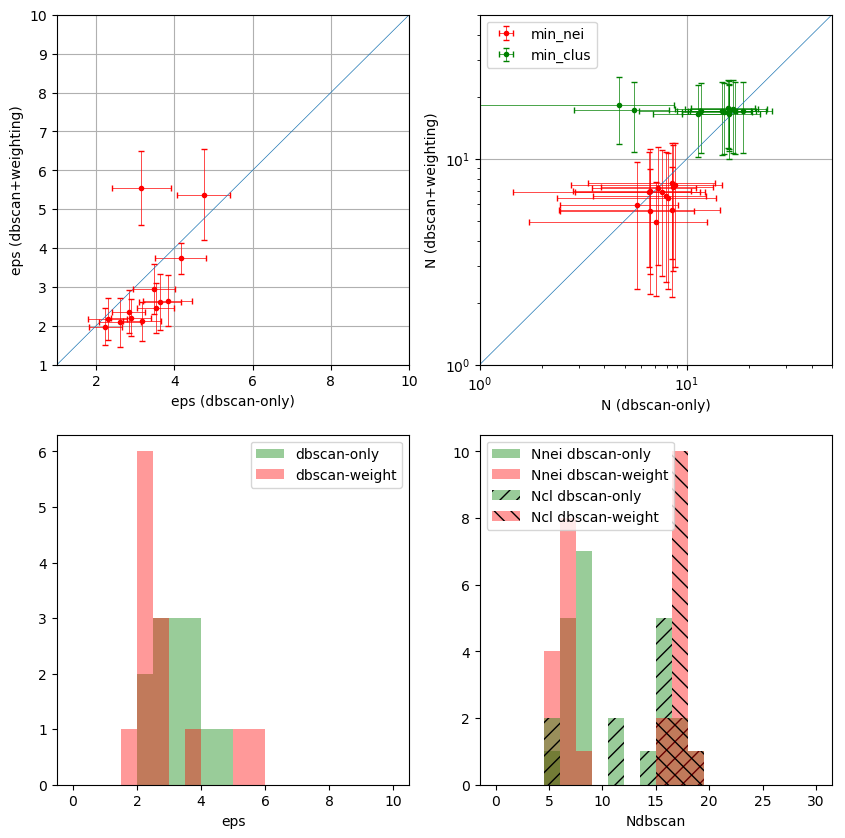

In [692]:
## comparison DBSCAN parameters

fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10.],[0.,10], linewidth = 0.5)
errorbar(mcj[:epsm],mcj[:epsm_1] , xerr=mcj[:epsd],yerr= mcj[:epsd_1] , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax[:set_xlim]([1.,10])
ax[:set_ylim]([1.,10])
xlabel("eps (dbscan-only)")
ylabel("eps (dbscan+weighting)")

ax = subplot(222)
grid("on") 
plot([0.,10000.],[0.,10000], linewidth = 0.5)
errorbar(mcj[:mneim],mcj[:mneim_1] , xerr=mcj[:mneid],yerr= mcj[:mneid_1] , fmt = ".r" , 
    capsize = 2 ,elinewidth=0.5, label="min_nei")
errorbar(mcj[:mclm],mcj[:mclm_1] , xerr=mcj[:mcld],yerr= mcj[:mcld_1] , fmt = ".g" , 
    capsize = 2 ,elinewidth=0.5, label="min_clus")
ax[:set_xlim]([1.,50])
ax[:set_ylim]([1.,50])
legend(loc="upper left")
xscale("log")
yscale("log")
xlabel("N (dbscan-only)")
ylabel("N (dbscan+weighting)")

ax = subplot(223)
nbins = 20
h = plt[:hist](mcj[:epsm],nbins,range = [0.,10.], color = "g", alpha=0.4 , label = "dbscan-only")
h = plt[:hist](mcj[:epsm_1],nbins,range = [0., 10.] , color = "r", alpha=0.4 , label = "dbscan-weight")
legend()
xlabel("eps")

ax = subplot(224)
nbins = 20
h = plt[:hist](mcj[:mneim],nbins, range = [0,30],  color = "g", alpha=0.4 , label = "Nnei dbscan-only")
h = plt[:hist](mcj[:mneim_1],nbins, range = [0,30], color = "r", alpha=0.4 , label = "Nnei dbscan-weight")
h = plt[:hist](mcj[:mclm],nbins, range = [0,30], color = "g", hatch="//", alpha=0.4 , label = "Ncl dbscan-only")
h = plt[:hist](mcj[:mclm_1],nbins, range = [0,30], color = "r", hatch="\\\\", alpha=0.4 , label = "Ncl dbscan-weight")
legend(loc="upper left")
xlabel("Ndbscan")
show()

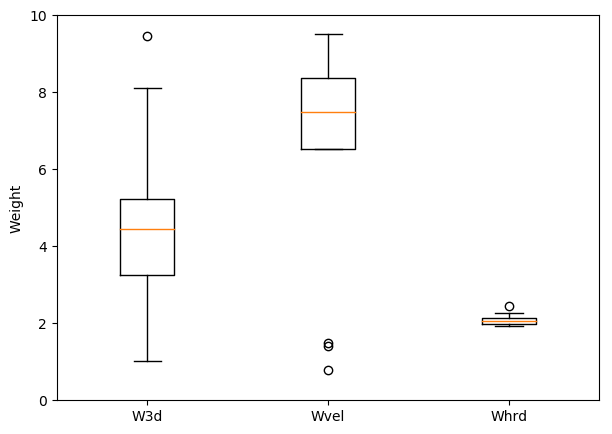

W3d : 4.678974540331937
Wvel : 6.526972826896456
Whrd : 2.0946241019725917


In [693]:
### Weighting stats ..
fig = figure(figsize=(7,5))

ax = subplot(111)
ax[:set_ylim]([0.,10.])
data = [mcfull[:w3dm] ,mcfull[:wvelm] , mcfull[:whrdm]]
boxplot(data)
ax[:set_xticklabels](["W3d","Wvel","Whrd"])
ylabel("Weight")

show()
println("W3d : ",mean(mcfull[:w3dm]))
println("Wvel : ",mean(mcfull[:wvelm]))
println("Whrd : ",mean(mcfull[:whrdm]))

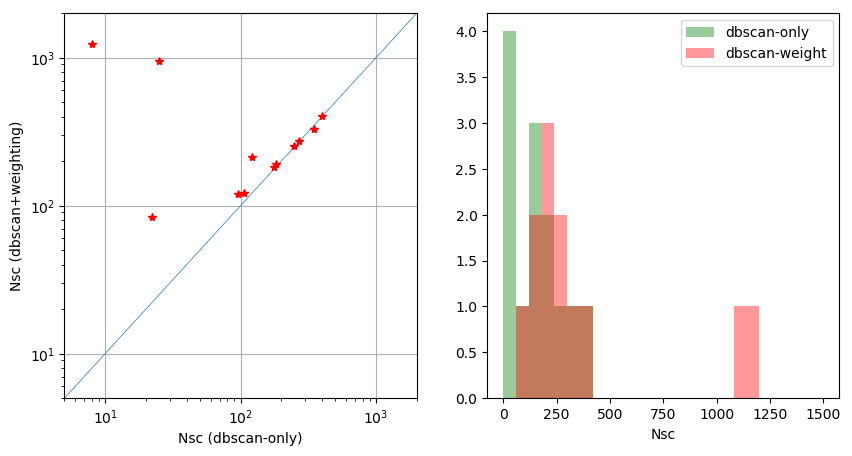

In [694]:
## Number of stars in the final SC

fig = figure(figsize=(10,5))

ax = subplot(121)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:nstars], scj[:nstars_1], "*r")
ax[:set_xlim]([5.,2000.])
ax[:set_ylim]([5.,2000.])
xlabel("Nsc (dbscan-only)")
ylabel("Nsc (dbscan+weighting)")
xscale("log")
yscale("log")

ax = subplot(122)
nbins = 25
h = plt[:hist](mcj[:qnm],nbins,range = [0,1500], color = "g", alpha=0.4 , label = "dbscan-only")
h = plt[:hist](mcj[:qnm_1],nbins,range = [0,1500], color = "r", alpha=0.4 , label = "dbscan-weight")
legend()
xlabel("Nsc")

show()

###  Comparison of the SC properties for the optimization with DBSCAN only and DBSCAN+weighting 

<br>
<br>

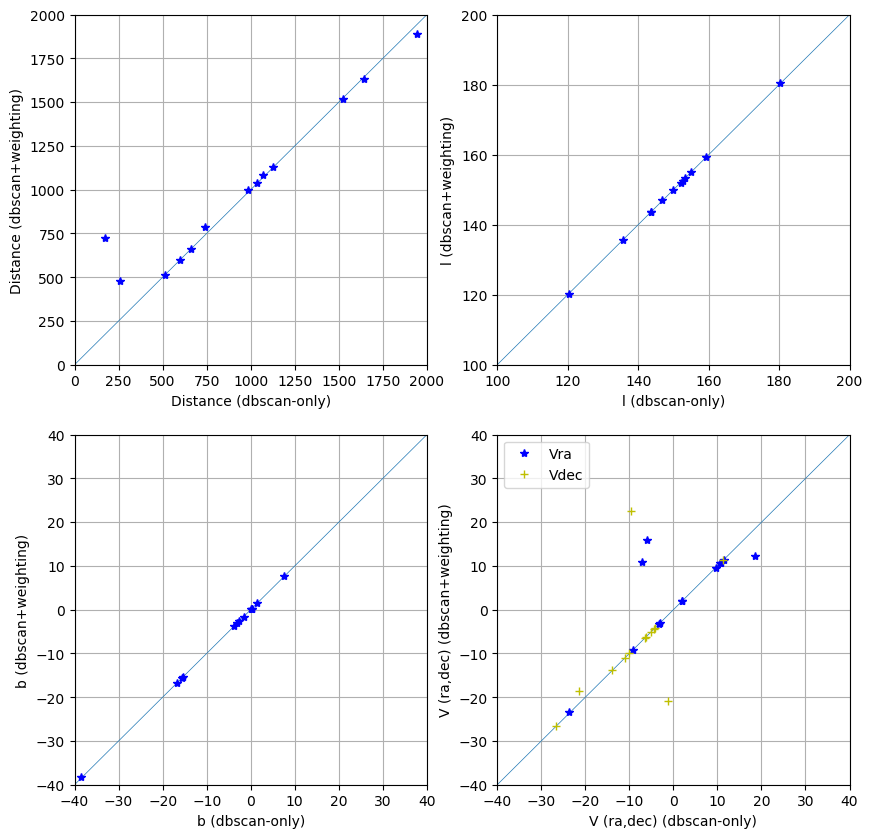

In [695]:
## Distance , position, velocity

fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:distance], scj[:distance_1], "*b")
ax[:set_xlim]([0.,2000.])
ax[:set_ylim]([0.,2000.])
xlabel("Distance (dbscan-only)")
ylabel("Distance (dbscan+weighting)")

ax = subplot(222)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:l], scj[:l_1], "*b")
ax[:set_xlim]([100.,200.])
ax[:set_ylim]([100.,200.])
xlabel("l (dbscan-only)")
ylabel("l (dbscan+weighting)")

ax = subplot(223)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot(scj[:b], scj[:b_1], "*b")
ax[:set_xlim]([-40.,40.])
ax[:set_ylim]([-40.,40.])
xlabel("b (dbscan-only)")
ylabel("b (dbscan+weighting)")

ax = subplot(224)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot(scj[:vra], scj[:vra_1], "*b", label = "Vra")
plot(scj[:vdec], scj[:vdec_1], "+y", label = "Vdec")
legend()
ax[:set_xlim]([-40.,40.])
ax[:set_ylim]([-40.,40.])
xlabel("V (ra,dec) (dbscan-only)")
ylabel("V (ra,dec) (dbscan+weighting)")

show()

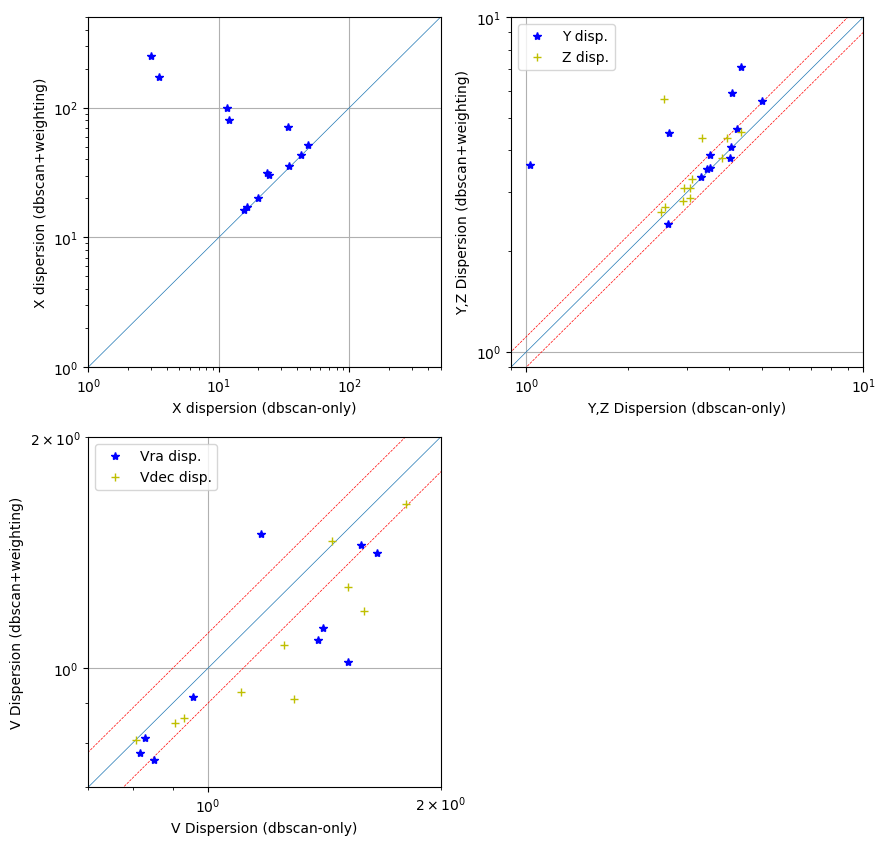

In [696]:
## Dispersions ...
fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:xdisp], scj[:xdisp_1], "*b")
ax[:set_xlim]([1,500.])
ax[:set_ylim]([1,500.])
xlabel("X dispersion (dbscan-only)")
ylabel("X dispersion (dbscan+weighting)")
xscale("log")
yscale("log")

ax = subplot(222)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot([-10000.,10000.],[-9000.,9000] ,"r--" ,linewidth = 0.5)
plot([-9000.,9000],[-10000.,10000.] ,"r--" ,linewidth = 0.5)
plot(scj[:ydisp], scj[:ydisp_1], "*b", label = "Y disp.")
plot(scj[:zdisp], scj[:zdisp_1], "+y", label = "Z disp.")
legend()
ax[:set_xlim]([0.9,10.])
ax[:set_ylim]([0.9,10.])
xlabel("Y,Z Dispersion (dbscan-only)")
ylabel("Y,Z Dispersion (dbscan+weighting)")

xscale("log")
yscale("log")


ax = subplot(223)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot([-10000.,10000.],[-9000.,9000] ,"r--" ,linewidth = 0.5)
plot([-9000.,9000],[-10000.,10000.] ,"r--" ,linewidth = 0.5)
plot(scj[:vradisp], scj[:vradisp_1], "*b", label = "Vra disp.")
plot(scj[:vdecdisp], scj[:vdecdisp_1], "+y", label = "Vdec disp.")
legend(loc="upper left")
ax[:set_xlim]([0.7, 2.])
ax[:set_ylim]([0.7, 2.])
xlabel("V Dispersion (dbscan-only)")
ylabel("V Dispersion (dbscan+weighting)")

xscale("log")
yscale("log")
show()